<div style="text-align: left;"><img src="https://www.juliabox.org/assets/img/juliacloudlogo.png" style="margin: 0px 0px 0px 0px; padding-right: 20px;width: 80px; float: left;" title="" alt="" /></div>
<img src="http://dmkpress.com/images/cms/thumbs/a5b0aeaa3fa7d6e58d75710c18673bd7ec6d5f6d/978-5-97060-370-3_270_369__100.jpg" style="margin: 0px 0px 5px 20px; width: 100px; float: right;" title="" alt="" />
Всестороннее введение в новый язык программирования для научно-технических вычислений [Julia](http://julialang.org/) в книге Малколма Шеррингтона, Packt Publishing, июль 2015.

<h1>Осваиваем язык Julia</h1><br />

Совершенствование мастерства в области аналитики и программирования при помощи Julia в целях решения задач комплексной обработки данных
<div style="text-align: left;font-size:8pt;padding-top:10px;">Программный код Julia (v0.4.5) протестирован в Windows 8.1/10 и Linux/Lubuntu 16.4</div>
<div style="text-align: left;"><h1>Глава 5. Работа с данными</h1></div>

# Отдельные темы
## Временные ряды

In [147]:
using TimeSeries

cd(joinpath(homedir(), "julia_projects","data")); 

ta = readtimearray("AAPL_Short.csv")

752x12 TimeSeries.TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-03 to 2002-12-31

             Open      High      Low       Close     Volume          Ex-Dividend  Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume     
2000-01-03 | 104.88    112.5     101.69    111.94    4783900         0            1            25.2004    27.0313    24.4339   26.8968     19135600        
2000-01-04 | 108.25    110.62    101.19    102.5     4574800         0            1            26.0101    26.5796    24.3138   24.6285     18299200        
2000-01-05 | 103.75    110.56    103.0     104.0     6949300         0            1            24.9289    26.5652    24.7487   24.989      27797200        
2000-01-06 | 106.12    107.0     95.0      95.0      6856900         0            1            25.4984    25.7098    22.8265   22.8265     27427600        
⋮
2002-12-26 | 14.42     14.81     14.28     14.4      1525400         0            1            6.9296     7.117      6.8624    6.92

In [148]:
colnames(ta)

12-element Array{UTF8String,1}:
 "Open"       
 "High"       
 "Low"        
 "Close"      
 "Volume"     
 "Ex-Dividend"
 "Split Ratio"
 "Adj. Open"  
 "Adj. High"  
 "Adj. Low"   
 "Adj. Close" 
 "Adj. Volume"

In [150]:
ta0 = from(to(ta,Date(2000,12,31)), Date(2000,1,1))

252x12 TimeSeries.TimeArray{Float64,2,Date,Array{Float64,2}} 2000-01-03 to 2000-12-29

             Open      High      Low       Close     Volume          Ex-Dividend  Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume     
2000-01-03 | 104.88    112.5     101.69    111.94    4783900         0            1            25.2004    27.0313    24.4339   26.8968     19135600        
2000-01-04 | 108.25    110.62    101.19    102.5     4574800         0            1            26.0101    26.5796    24.3138   24.6285     18299200        
2000-01-05 | 103.75    110.56    103.0     104.0     6949300         0            1            24.9289    26.5652    24.7487   24.989      27797200        
2000-01-06 | 106.12    107.0     95.0      95.0      6856900         0            1            25.4984    25.7098    22.8265   22.8265     27427600        
⋮
2000-12-26 | 14.88     15.0      14.25     14.69     3871700         0            1            7.1507     7.2084     6.8479    7.05

In [151]:
lag(ta0["Close"],30)[1]    

1x1 TimeSeries.TimeArray{Float64,1,Date,Array{Float64,1}} 2000-02-15 to 2000-02-15

             Close     
2000-02-15 | 111.94    


In [152]:
lead(ta0["Close"],30)[1]    

1x1 TimeSeries.TimeArray{Float64,1,Date,Array{Float64,1}} 2000-01-03 to 2000-01-03

             Close     
2000-01-03 | 119       


In [153]:
moving(ta0["Close"],mean,30)

223x1 TimeSeries.TimeArray{Float64,1,Date,Array{Float64,1}} 2000-02-14 to 2000-12-29

             Close     
2000-02-14 | 105.2393  
2000-02-15 | 105.4747  
2000-02-16 | 105.862   
2000-02-17 | 106.2247  
⋮
2000-12-26 | 16.6077   
2000-12-27 | 16.4553   
2000-12-28 | 16.274    
2000-12-29 | 16.1073   


In [154]:
collapse(ta["Close"], mean, period=month)

use collapse(ta::TimeArray, period::Function, timestamp::Function, value::Function=timestamp) instead


36x1 TimeSeries.TimeArray{Float64,1,Date,Array{Float64,1}} 2000-01-31 to 2002-12-31

             Close     
2000-01-31 | 103.3595  
2000-02-29 | 111.6375  
2000-03-31 | 128.5026  
2000-04-28 | 123.1058  
⋮
2002-09-30 | 14.525    
2002-10-31 | 14.6504   
2002-11-29 | 15.963    
2002-12-31 | 37.1255   


In [155]:
maximum(abs(values(percentchange(ta0["Close"]))))

0.5186915887850467

In [157]:
for i in find(ta["Close"] .> 125)
  ts = ta0["Close"].timestamp[i]
  vals = ta0["Close"].values[i]
  println(ts, ": ", vals)
end

2000-03-01: 130.31
2000-03-03: 128.0
2000-03-06: 125.69
2000-03-10: 125.75
2000-03-21: 134.94
2000-03-22: 144.19
2000-03-23: 141.31
2000-03-24: 138.69
2000-03-27: 139.56
2000-03-28: 139.12
2000-03-29: 135.94
2000-03-30: 125.75
2000-03-31: 135.81
2000-04-03: 133.31
2000-04-04: 127.31
2000-04-05: 130.38
2000-04-06: 125.19
2000-04-07: 131.75
2000-04-18: 126.88
2000-04-25: 128.31
2000-04-27: 126.75


## Распределения вероятностей

In [158]:
using Distributions;

Poisson(2.2) 

Distributions.Poisson(λ=2.2)

In [159]:
mean(Poisson(2.2)) 

2.2

In [160]:
std(Poisson(2.2)) 

1.4832396974191326

In [161]:
median(Poisson(2.2))

2

In [162]:
for i = 0:5
  pf = pdf(Poisson(2.2), i)
  cf = cdf(Poisson(2.2), i)
  @printf "%d : %7.4f %7.4f\n" i pf cf
end

0 :  0.1108  0.1108
1 :  0.2438  0.3546
2 :  0.2681  0.6227
3 :  0.1966  0.8194
4 :  0.1082  0.9275
5 :  0.0476  0.9751


In [163]:
rand(Poisson(2.2),15)

15-element Array{Int64,1}:
 3
 0
 0
 1
 2
 3
 3
 0
 2
 3
 1
 1
 1
 0
 3

In [164]:
fit(Poisson, rand(Poisson(2.2),1000))

Distributions.Poisson(λ=2.165)

### Ядерная оценка плотности

In [3]:
cd(joinpath(homedir(), "julia_projects","data")); 

using RDatasets, KernelDensity

# вспомогательная функция NaN -> NA
function nan2na(df)
    for c in eachcol(df)
        nans = find(x->isa(x,AbstractFloat) && isnan(x),c[2])
        df[nans,c[1]] = NA
    end
    df
end

mlmf = dataset("mlmRev","Gcsemv")
mlmf = @unix ? mlmf : nan2na(mlmf); # только для Windows

df = mlmf[complete_cases(mlmf[[:Written, :Course]]), :];

dc = convert(Array, df[:Course]); kdc = kde(dc);
dw = convert(Array, df[:Written]); kdw = kde(dw);

In [4]:
ssw = summarystats(dw[!isnan(dw)])  

Summary Stats:
Mean:         46.502298
Minimum:      0.600000
1st Quartile: 38.000000
Median:       46.000000
3rd Quartile: 56.000000
Maximum:      90.000000


In [5]:
ssc = summarystats(dc[!isnan(dc)])

Summary Stats:
Mean:         73.381385
Minimum:      9.250000
1st Quartile: 62.900000
Median:       75.900000
3rd Quartile: 86.100000
Maximum:      100.000000


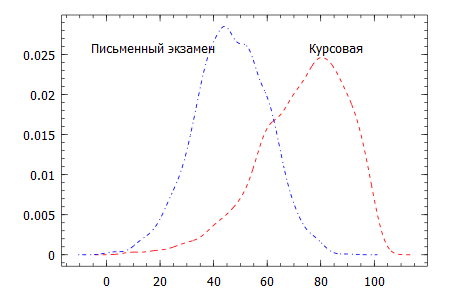

In [7]:
using Winston

kdc = kde(dc); kdw = kde(dw);
using Winston;
p = Winston.plot(kdc.x, kdc.density, "r--", kdw.x, kdw.density, "b;")
add(p, PlotLabel(.25, .87, "Письменный экзамен", color=0x0))
add(p, PlotLabel(.75, .87, "Курсовая", color=0x0))

## Проверка статистических гипотез

In [171]:
for subdf in groupby(df, :School)
  (size(subdf)[1] > 40) && 
  @printf "%10s : %8.4f %8.4f\n" subdf[:School][1] mean(subdf[:Written]) mean(subdf[:Course])
end

     22520 :  35.4482  57.4580
     60457 :  53.4773  85.9568
     68107 :  44.9107  74.6750
     68125 :  47.1556  77.5322
     68137 :  28.2807  62.5373
     68411 :  40.4615  59.4369
     68809 :  42.7705  71.1115


In [172]:
cd(joinpath(homedir(), "julia_projects","data")); 

using HypothesisTests

# вспомогательная функция NaN -> NA
function nan2na(df)
    for c in eachcol(df)
        nans = find(x->isa(x,AbstractFloat) && isnan(x),c[2])
        df[nans,c[1]] = NA
    end
    df
end

mlmf = dataset("mlmRev","Gcsemv")
mlmf = @unix ? mlmf : nan2na(mlmf); # только для Windows


df1 = mlmf[mlmf[:School] .== "68107", :];
df1 = df1[complete_cases(df1[[:Written, :Course]]), :];

df2 = mlmf[mlmf[:School] .== "68411", :];
df2 = df2[complete_cases(df2[[:Written, :Course]]), :];

In [173]:
UnequalVarianceTTest( map(Float64,df1[:Written]), map(Float64,df2[:Written]) )

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          4.449175824175825
    95% confidence interval: (-0.18365665078923588,9.082008299140885)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.05962747379789212 (not significant)

Details:
    number of observations:   [56,65]
    t-statistic:              1.903253187099572
    degrees of freedom:       109.74148002018097
    empirical standard error: 2.3376689209469106


In [174]:
UnequalVarianceTTest( map(Float64,df1[:Course]), map(Float64,df2[:Course]))

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          15.238076923076925
    95% confidence interval: (10.62552780212873,19.85062604402512)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           1.6304342326804862e-9 (extremely significant)

Details:
    number of observations:   [56,65]
    t-statistic:              6.541977424916665
    degrees of freedom:       118.13175559744462
    empirical standard error: 2.329276904111456


## Обобщенная линейная модель

In [176]:
cd(joinpath(homedir(), "julia_projects","data")); 

using GLM;

mlmf = dataset("mlmRev", "Gcsemv");
mlmf = @unix ? mlmf : nan2na(mlmf); # только для Windows

df1 = mlmf[mlmf[:School] .== "68107", :];
df1 = df1[complete_cases(df1[[:Written, :Course]]), :];
df2 = mlmf[mlmf[:School] .== "68411", :];
df2 = df2[complete_cases(df2[[:Written, :Course]]), :];

dw1s = sort(sample(df1[:Written],50));
dw2s = sort(sample(df2[:Written],50));
dc1s = sort(sample(df1[:Course],50));
dc2s = sort(sample(df2[:Course],50));

In [177]:
cor(dw1s, dw2s)   

0.967660080424631

In [178]:
cor(dc1s, dc2s)   

0.9558884075464557

In [181]:
dw = DataFrame(X = dw1s, Y = dw2s)
names!(dw, [symbol("s68107"), symbol("s68411")])
dc = DataFrame(X = dc1s, Y = dc2s);
names!(dc, [symbol("s68107"), symbol("s68411")])

,s68107,s68411
1,50.0,38.8
2,55.5,42.5
3,55.5,45.3
4,55.5,47.2
5,61.1,50.0
6,61.1,50.9
7,62.0,52.7
8,63.8,52.7
9,64.8,55.5
10,65.7,55.5


In [182]:
lm1 = fit(LinearModel, s68107 ~ s68411, dw)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Float64}

Formula: s68107 ~ 1 + s68411

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -18.5084   2.38177 -7.77086    <1e-9
s68411        1.48283 0.0557945  26.5766   <1e-29


In [183]:
lm1 = fit(LinearModel, s68107 ~ s68411, dc)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Float64}

Formula: s68107 ~ 1 + s68411

Coefficients:
             Estimate Std.Error   t value Pr(>|t|)
(Intercept)  -2.73974   3.59387 -0.762337   0.4496
s68411        1.31407 0.0582825   22.5465   <1e-26
